# Исследование объявлений о продаже квартир

Заказчиком предоставленны данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо выявить ключевые факторы влияющие на стоимость недвижимости в регионе. Нужно определить среднюю рыночную стоимость квадратного метра жилья, а так же оценить влияние географической удаленности от центра на стоимость недвижимости.

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [680]:
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [681]:
data.duplicated().sum() # Проверим на наличие дубликатов

0

In [682]:
data.isnull().sum() # Проверим на наличие пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Дубликаты в данных отсутствуют.

В столбцах last_price, total_area, rooms, ceiling_height обнаружен ряд неадекватных значений, появившихся или ввиду ошибки или крайне не типичнх объектов недвижимости

Название столбца 'cityCenters_nearest' имеет символы в верхнем регистре, для удобства переименуем столбец в 'city_centers_nearest'

В столбце 'locality_name' обнаружены различные варианты написания слова "посёлок" и "поселок" приведем все к единому виду "поселок", причиной тому явно послужил человческий фактор при размещении объявлений

Типы данных: parks_around3000, ponds_around3000, last_price, total_area, living_area, floors_total, cityCenters_nearest, balcony, days_exposition - обладают типом данных float64, для упрощения работы с данными можно привести их типу данных int64, округлив до целых значений.

В столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition наблюдаются пропущеные значения, причиной чему могли послужить ошибки при выгрузке данных или сознательное упущение при размещении объявлений.

Пропуски в столбце days_exposition в данных имеют очень большой разброс значений, стандартное отклонение намного больше среднего, а медиана и среднее далеки друг от друга. Поэтому заполнение пропусков через среднее значение нам не подходит, так как такое заполнение не поможет сохранить необходимое распределение.
 
Пропущеные значения в столбце balcony могут говорить о том что в данных объектах недвижимости балконы отсутствуют, соответственно для того чтобы упростить последующую работу с данными можем заменить пропущенные значения на 0.

Пропуски в столбцах living_area и kitchen_area заполним найдя соответствующие коэфициенты к total_area

В столбце first_day_exposition тип данных 2019-03-07T00:00:00 лишние нули могут затруднить последующую обработку данных.

Пропуски в столбце cityCenters_nearest могут быть связаны со спецификой населенных пунктов, проверим эту теорию.

Пропуски в столбце locality_name могут быть связаны с ошибкой при выгрузке данных, таких случае всего 49 и их удаление из дата фрейма не повлияет на результаты иссладования.

### Шаг 2. Предобработка данных

### Исследование и заполнение пропусков в данных

#### Замена дубликатов в столбце 'locality_name'

In [683]:
data['locality_name'].value_counts() # Выведем список уникальных значений столбца locality_name

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
поселок Цвылёво                1
поселок Жилгородок             1
поселок станции Лужайка        1
деревня Хапо-Ое                1
деревня Борисова Грива         1
Name: locality_name, Length: 364, dtype: int64

In [684]:
data.query('locality_name in "посёлок Мурино"').head() # Обнаружены различные варианты написания одного населенного пунтка 
# присутствуют строки с написанием "посёлок Мурино"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,NaN,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
133,12,3150000.0,31.00,2018-03-23T00:00:00,1,NaN,25.0,NaN,6,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [685]:
data.query('locality_name in "поселок Мурино"').head() # А так же присутствуют строки с написанием "поселок Мурино"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
66,6,3450000.0,34.00,2015-12-16T00:00:00,1,2.60,17.0,17.40,8,False,...,11.50,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0
1467,1,4148000.0,66.91,2016-06-27T00:00:00,2,2.60,14.0,36.27,1,False,...,11.24,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,58.0
2026,9,2310000.0,33.69,2016-04-15T00:00:00,1,2.63,27.0,15.32,26,False,...,9.39,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,87.0
2408,0,3200000.0,40.00,2016-06-09T00:00:00,1,2.70,17.0,15.70,17,False,...,11.70,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,33.0
4777,0,2700000.0,28.20,2016-04-25T00:00:00,1,NaN,21.0,24.20,11,NaN,...,4.00,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,68.0


In [686]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') # Заменим букву ё на е для всего столбца 'locality_name'

In [687]:
data.query('locality_name in "посёлок Мурино"') # Проверяем замена прошла успешно значения "посёлок Мурино" теперь отсутствуют

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [688]:
data['locality_name'].value_counts() # Значения в разных варинтах написания теперь суммированы

Санкт-Петербург               15721
поселок Мурино                  556
поселок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Реброво                   1
деревня Вахнова Кара              1
деревня Снегиревка                1
поселок Ромашки                   1
садовое товарищество Рахья        1
Name: locality_name, Length: 330, dtype: int64

In [689]:
data.duplicated().sum() # Проверим не появились ли после группировки строки полностью дублирующие друг друга

0

#### Заполнение пропусков в столбце 'cityCenters_nearest'

In [690]:
# Для удобства переименуем столбец cityCenters_nearest в city_centers_nearest
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [691]:
# Проанализируем природу пропусков в столбце city_centers_nearest, попробуем заполнить пропуски нулями
data_cityCenters_lost = data 
data_cityCenters_lost['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)

In [692]:
# Прмиеним условие для вывода населеннных пунктов с дистанцией до центра 0
data_cityCenters_lost = data_cityCenters_lost.query('city_centers_nearest == 0')

In [693]:
# Построим сводную таблицу
data_loc = data_cityCenters_lost.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='count')

In [694]:
# Отсортируем получившиеся значения по убыванию
print(data_loc.sort_values(by = 'city_centers_nearest', ascending = False).head(20))

                           city_centers_nearest
locality_name                                  
поселок Мурино                              554
Всеволожск                                  398
Гатчина                                     307
деревня Кудрово                             299
Выборг                                      237
Кудрово                                     173
деревня Новое Девяткино                     144
Сертолово                                   142
Кириши                                      125
поселок Бугры                               114
Сланцы                                      112
Волхов                                      111
Кингисепп                                   104
Тосно                                       104
Никольское                                   93
Коммунар                                     89
Сосновый Бор                                 87
Кировск                                      84
Отрадное                                

In [695]:
# На основе полученых данных можем сделать вывод о том что большая часть пропусков в столбце 'city_centers_nearest'
# относятся к малым населенным пунктам и соответственно не повлияют на изучение стоимости квартир в Санкт-Петербурге

#### Заполнение пропусков в столбце 'ceiling_height'

In [696]:
# Выведем список уникальных значений столбца 'ceiling_height'
data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [697]:
# Посчитаем среднюю высоту потолков
data['ceiling_height'].mean() 

2.77149889685604

In [698]:
# Посчитаем медиану высоты потолков
data['ceiling_height'].median()

2.65

In [699]:
data.query('ceiling_height > 4') # Обнаружено 75 объявлений с высотой потолков больше четырех метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.2,2,NaN,...,12.2,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,0.0,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,0.0,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,NaN,...,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [700]:
data.query('ceiling_height < 2') # Аномально низких значений с высотой потолка менее 2 метров обнаружено только три строки
# Принимая во внимание наличие в этих помещениях кухонь, нельзя классифицировать их как чердачные помещения, соответствено можно
# отнести эти данные к категории опечаток 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской поселок Мга,NaN,0.0,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [701]:
# Заменим пропуски на медианное значение так как оно ближе среднего к существующему нормативу к высоте потолков, который согласно
# СНиП 23-01-99 для жилых помещений составляет 2.7м
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [702]:
# Проанализиуерм данные столбца 'ceiling_height' на предмет аномальных значений
percetnage =[.10, .85, .90, .95, .99]
data['ceiling_height'].describe(percentiles=percetnage)

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
10%          2.500000
50%          2.650000
85%          2.800000
90%          3.000000
95%          3.130000
99%          3.600000
max        100.000000
Name: ceiling_height, dtype: float64

In [703]:
# Согласно получившимся значениям, видим что число квартир с потолками свыше 3.6  метров и меньше 2 метров чрезвычайно мало
# и их исключение только улучшит качество текущего исследования

In [704]:
data = data.query('ceiling_height <= 5 & ceiling_height > 2') # Примем за аномалию недвижимость с потолками выше 5 метров
# и ниже 2 метров и уберем такие строки из датасета

In [705]:
data['ceiling_height'].value_counts() # Проверяим замена пропусков и отсечение анамалий прошли успешно

2.65    9871
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
4.30       1
4.37       1
3.68       1
4.25       1
2.49       1
Name: ceiling_height, Length: 160, dtype: int64

#### Заполнение пропусков в столбце 'balcony'

In [706]:
data['balcony'] = data['balcony'].fillna(0) # Заменим пропущеные значения в столбце 'balcony' нулями

In [707]:
data.isnull().sum() # Проверям пропускии в столбце 'balcony' заполнены

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1899
floor                       0
is_apartment            20888
studio                      0
open_plan                   0
kitchen_area             2267
balcony                     0
locality_name              49
airports_nearest         5523
city_centers_nearest        0
parks_around3000         5499
parks_nearest           15588
ponds_around3000         5499
ponds_nearest           14558
days_exposition          3170
dtype: int64

#### Заполнение пропусков в столбце 'living_area'

In [708]:
# Подсчитаем коэфициент жилой площади помощений, являющий собой отношение жилой площади к общей
data['living_part'] = data['living_area'] / data['total_area'] 

In [709]:
print(data['living_part'].mean()) # Усредяем все полученые значения в единый коэфциент

0.5646980521297087


In [710]:
# Заполним пропуски для столбца living_area умножив общую площадь квартир с пропусками на выведеный коэффициент жилой площади
data['living_area'] = data['living_area'].fillna(data['total_area'] * data['living_part'].mean()) 

#### Заполнение пропусков в столбце 'kitchen_area'

In [711]:
# Подсчитаем коэфициент жилой площади помещений являющий собой отношение площади кухонь к общей
data['kitchen_part'] = data['kitchen_area'] / data['total_area'] 

In [712]:
print(data['kitchen_part'].mean()) # Усредяем все полученые значения в единый коэфциент

0.18736791080045645


In [713]:
# Заполним пропуски для столбца kitchen_area умножив общую площадь квартир с пропусками на выведеный коэффициент площади кухонь
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * data['kitchen_part'].mean())

In [714]:
data.isnull().sum() # Проверяем, пропуски в столбцах kitchen_area и living_area устранены

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20888
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5523
city_centers_nearest        0
parks_around3000         5499
parks_nearest           15588
ponds_around3000         5499
ponds_nearest           14558
days_exposition          3170
living_part              1899
kitchen_part             2267
dtype: int64

#### Заполнение пропусков в столбце 'rooms'

In [715]:
# Сохраним в переменной data_rooms0 только квартиры "нулевым" числом комнат
data_rooms0 = data.query('rooms == 0') 

In [716]:
# Найдем среднюю площадь квартир с "нулевым" числом комнат
print(data_rooms0['total_area'].mean()) 

29.087743589743592


In [717]:
# Средняя площадь квартир с "нулевым" числом комнат составила 29 м2, что соответствует площади стандартаной квартиры-студии
# Можно так же предположить что "нулевым" числом комнат обозначены предложания о продаже комнат в комнулках

In [718]:
# Cформируем сводную талицу чтобы посчитать количество квартир с 0 числом комнат
data.pivot_table(index='rooms', values='studio', aggfunc='count')

,studio
rooms,
0,195
1,8030
2,7923
3,5805
4,1178
5,324
6,104
7,59
8,12


In [719]:
# обнаружено 195 квартир с нулевым количеством комнат, что составляет меньше 1% от общего числа данных, соответственно для того
# чтобы защитить результаты от влияния данной аномалии, уберем все квартиры с числом комнат меньше 1
data = data.query('rooms > 0')

In [720]:
# Проверяем с помощью сводной таблицы, квартиры с нулевым числом комнат теперь отсутствуют
data.pivot_table(index='rooms', values='studio', aggfunc='count')

,studio
rooms,
1,8030
2,7923
3,5805
4,1178
5,324
6,104
7,59
8,12
9,8


#### Заполнение пропусков в столбце 'locality_name'

In [721]:
# Подсчитаем число пропусков в столбце locality_name
data['locality_name'].isna().sum()

49

In [722]:
# В данном исследовании данные столбца locality_name являются критически важными, а информации для установления причин возникновения
# пропусков и их последующего заполнения реальными значениями - недостаточно. Поэтому удалим строки с пропущеными значениями.

In [723]:
# Заполним пропуски в столбце locality_name нулями
data['locality_name'] = data['locality_name'].fillna(0)

In [724]:
# Теперь уберем все нулевые значения в столбце locality_name из датафрейма
data = data.query('locality_name != 0')

In [725]:
# Проверяем, пропуски в столбце locality_name устранены
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23405 non-null int64
last_price              23405 non-null float64
total_area              23405 non-null float64
first_day_exposition    23405 non-null object
rooms                   23405 non-null int64
ceiling_height          23405 non-null float64
floors_total            23323 non-null float64
living_area             23405 non-null float64
floor                   23405 non-null int64
is_apartment            2740 non-null object
studio                  23405 non-null bool
open_plan               23405 non-null bool
kitchen_area            23405 non-null float64
balcony                 23405 non-null float64
locality_name           23405 non-null object
airports_nearest        17968 non-null float64
city_centers_nearest    23405 non-null float64
parks_around3000        17992 non-null float64
parks_nearest           8018 non-null float64
ponds_around300

#### Заполнение пропусков в столбце 'floors_total'

In [726]:
data['floors_total'].isna().sum() # Посчитаем число пропусков в столбце floors_total

82

In [727]:
data.query('floors_total =="NaN"') # Изучим строки с пропущенными значениями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.800000,4,NaN,...,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,0.472393,0.184049
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.750000,1,NaN,...,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,0.738434,NaN
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.400000,12,NaN,...,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,0.542373,0.150141
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.100000,8,NaN,...,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,0.503205,0.179487
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,22.023224,9,NaN,...,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,35.858326,3,NaN,...,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,NaN,NaN
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.700000,20,NaN,...,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,0.491473,0.223256
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.380000,6,NaN,...,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,0.411051,0.212138
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.400000,18,NaN,...,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,0.408759,0.191403


In [728]:
floors_median = data['floors_total'].median() # Посчитаем медиану для столбца foors_total
print(floors_median)

9.0


In [729]:
# Напишем функцию которая сможет заменить пропущенные значения в столбце floors_total на медианное
# Так же включим в функцию условие при котором, если квартира из размещенного объявления расположена на этаже вышем чем 
# медианный этаж, пропущенное значение будет заменено значением этажа на котором расположена квартира.
def floors_not_NaN(row):
    floor = row['floor']
    floors = row['floors_total']
    if floors != floors and floor < floors_median:
        return floors_median
    if floors != floors:
        return floor
    else:
        return floors

In [730]:
# Применяем написаную функцию к столбцу floors_total
data['floors_total'] = data.apply(floors_not_NaN, axis=1)

In [731]:
data.query('floors_total == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part


In [732]:
data.info() # Проверяем, пропуски в столбце floors_total устранены

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23405 non-null int64
last_price              23405 non-null float64
total_area              23405 non-null float64
first_day_exposition    23405 non-null object
rooms                   23405 non-null int64
ceiling_height          23405 non-null float64
floors_total            23405 non-null float64
living_area             23405 non-null float64
floor                   23405 non-null int64
is_apartment            2740 non-null object
studio                  23405 non-null bool
open_plan               23405 non-null bool
kitchen_area            23405 non-null float64
balcony                 23405 non-null float64
locality_name           23405 non-null object
airports_nearest        17968 non-null float64
city_centers_nearest    23405 non-null float64
parks_around3000        17992 non-null float64
parks_nearest           8018 non-null float64
ponds_around300

#### Заполнение пропусков в столбце 'is_apartment'

In [733]:
# Посчитаем число пропусков в столбце is_apartment
data['is_apartment'].isnull().sum()

20665

In [734]:
# Посчитаем количество уникальных значений в столбце is_apartment
data['is_apartment'].value_counts()

False    2693
True       47
Name: is_apartment, dtype: int64

In [735]:
# Проанализировав имеющиеся данные можем сделать вывод что пропуски в столбце is_apartment возникли в ввиду того что владельцы 
# недвижимости при размещении объявлений не относят ее к категории апартаментов и пропускают данный пункт. Соответственно мы можем
# заменить пропуски в столбце is_apartment значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [736]:
# Приведем столбец is_apartment к типу данных bool
data['is_apartment'] = data['is_apartment'].astype('bool')

In [737]:
# Проверяем, пропуски в столбце is_apartment устранены
data['is_apartment'].isnull().sum()

0

In [738]:
# Посчитаем, пропуски в столбце is_apartment заменены именно на False
data['is_apartment'].value_counts()

False    23358
True        47
Name: is_apartment, dtype: int64

#### Заполнение пропусков в столбце 'day_exposition'

In [739]:
# Посчитаем число пропусков в столбце days_exposition

In [740]:
data['days_exposition'].isnull().sum()

3155

In [741]:
# Посчитаем среднее значение в столбце days_exposition
data['days_exposition'].mean()

181.40775308641975

In [742]:
# Посчитаем медиану для столбце days_exposition
data['days_exposition'].median()

96.0

In [743]:
# Медиана в данном случае больше подходит для заполнения пропусков в столбце days_exposition, так как менее подвержена влиянию 
# существенного разрброса значений присутствуещего в текущем столбце.
days_exposition_median = data['days_exposition'].median()

In [744]:
# Напишем функцию заменяющую пропуски в столбце days_exposition на медианое значение
def days_exposition_not_NaN(row):
    days = row['days_exposition']
    if days != days:
        return days_exposition_median
    else:
        return days   

In [745]:
# Применим получившуюся функцию к столбцу days_exposition
data['days_exposition'] = data.fillna(days_exposition_not_NaN, axis=1)

In [746]:
# Проверяем, пропуски устранены
print(data['days_exposition'].isnull().sum())

0


#### Вывод

<br/>- Для устранения рызличных вариантов написания идентичных населенных пунктов в столбце locality_name, все буквы 'ё' в столбце были заменены на 'е'
<br/>- Установлено что нули в столбце city_centers_nearest соответствуют малым населенным пунктам и их было решено оставить в датафрейме, так как информации для их заполнения недостаточно, их удаление повлечет потерю значительного массива данных, а для того чтобы определить кореляцию цены недвижимости и расстояния до центра Санкт-Петербурга, эти данные не понадобятся.
<br/>- Пропуски в столбце ceiling_height заменены медианным значением, а так же выявлены и отсечены артефактные значения
<br/>- Пропуски в столбце balcony заполнены нулями
<br/>- Пропуски в столбцах living_area и kitchen_area заменены на произведение общей площади квартиры и соответствующего коэфицента
<br/>- Строки с пропущеными значениями в столбце rooms удалены полностью 
<br/>- Строки с пропущеными значениями в столбце locality_name удалены полностью
<br/>- Пропущеные значения в столбце is_apartment заменены на False
<br/>- Пропущеные значения в столбце floors_total заменены медианным значением
<br/>- Пропущеные значения в столбце days_exposition так же заменены медианным значением 
<br/>- Пропущеные значения в столбцах airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest было решено не заполонять, так как данные этих столбцов не потребуются для поиска ответов на стоящие перед нами вопросы


#### Изменение типов данных

In [747]:
# Изучим все представленные в датафрейме типы данных
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23405 non-null int64
last_price              23405 non-null float64
total_area              23405 non-null float64
first_day_exposition    23405 non-null object
rooms                   23405 non-null int64
ceiling_height          23405 non-null float64
floors_total            23405 non-null float64
living_area             23405 non-null float64
floor                   23405 non-null int64
is_apartment            23405 non-null bool
studio                  23405 non-null bool
open_plan               23405 non-null bool
kitchen_area            23405 non-null float64
balcony                 23405 non-null float64
locality_name           23405 non-null object
airports_nearest        17968 non-null float64
city_centers_nearest    23405 non-null float64
parks_around3000        17992 non-null float64
parks_nearest           8018 non-null float64
ponds_around3000

In [748]:
# Сохраним в переменной columns названия столбцов, в которых необходимо изменить тип данных
columns = ['last_price', 'total_area', 'floors_total', 'living_area', 'kitchen_area', 
           'days_exposition', 'city_centers_nearest', 'balcony']

In [749]:
# Приведем данные к целому числовому значению, зменим тип данных для переменной columns на int64
data[columns] = data[columns].astype('int')

In [750]:
# Для удобства восприятия информации переведем рубли в столбце last_price в миллионы рублей поделив все значения в столбце на миллион
data['last_price'] = data['last_price'] / 1000000

In [751]:
# Проверяем, все типы данных изменены успешно.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23405 non-null int64
last_price              23405 non-null float64
total_area              23405 non-null int64
first_day_exposition    23405 non-null object
rooms                   23405 non-null int64
ceiling_height          23405 non-null float64
floors_total            23405 non-null int64
living_area             23405 non-null int64
floor                   23405 non-null int64
is_apartment            23405 non-null bool
studio                  23405 non-null bool
open_plan               23405 non-null bool
kitchen_area            23405 non-null int64
balcony                 23405 non-null int64
locality_name           23405 non-null object
airports_nearest        17968 non-null float64
city_centers_nearest    23405 non-null int64
parks_around3000        17992 non-null float64
parks_nearest           8018 non-null float64
ponds_around3000        1799

#### Вывод

Для удобства дальнейшей работы с данными, мы изменили тип данны в столбцах last_price, total_area, living_area, living_area, kitchen_area, floors_total, city_centers_nearest, balcony, days_exposition на int64, а так же для столбца last_price мы перевели перевели все значения в миллионы.

### Шаг 3. Посчитаем и добавим в таблицу недостающие данные

#### Посчитаем и добавим в таблицу цену квадратного метра

In [752]:
# Добавим в таблицу столбец 'square_meter_price_mln' со стоимостью квадратного метра в миллионах рублей
# Для этого поделим стоимость каждой квартиры на ее площадь
data['square_meter_price_mln'] = data['last_price']/data['total_area']

In [753]:
# Проверяем, столбец добавлен
print(data['square_meter_price_mln'].head())

0    0.120370
1    0.083750
2    0.092786
3    0.408176
4    0.100000
Name: square_meter_price_mln, dtype: float64


#### Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления

In [754]:
# Изменим формат данных в столбце first_day_exposition на более удобный, исключающий нулевые значения времени размещения объявлений
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [755]:
# Проверяем формат изменен
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [756]:
# Добавим в таблицу столбец включающий в себя информацию о дне недели размещения объявления
data['day_name_exposition'] = data['first_day_exposition'].dt.day_name()

In [757]:
# Добавим в таблицу столбец включающий в себя информацию о том в каком месяце размещено объявление
data['month_name_exposition'] = data['first_day_exposition'].dt.month_name()

In [758]:
# Добавим в таблицу столбец включающий в себя информацию о том в каком году размещено объявление
data['year_exposition'] = data['first_day_exposition'].dt.year

In [759]:
# Выведем дату размещения последнего объявления
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

#### Посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой

In [760]:
# Напишем функцию сравнивающую данные в стобцах floor и floors_total и в зависимости от результат сравнения возвращающую 
# значения: Первый, Последний, Другой

def floor_counter(row):   
        if row['floor'] == 1:
            return 'Первый'
        elif row['floor'] == row['floors_total']:
            return 'Последний'
        else:
            return 'Другой'
        

In [761]:
# Применим получившуюся функцию к нашему датафрейму, результаты сохраним в столбце floor_type
data['floor_type'] = data.apply(floor_counter, axis=1)

In [762]:
# Посмотрим результаты распределения
data['floor_type'].value_counts()

Другой       17168
Последний     3348
Первый        2889
Name: floor_type, dtype: int64

#### Посчитаем и добавим в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей

In [763]:
# Посчитаем соотношение жилой и общей площади для каждой квартиры в процентах, результат сохраним в столбец living_ratio_%
data['living_ratio_%'] = ((data['living_area'] / data['total_area']) * 100).astype('int')

In [764]:
# Проверяем, соотношение посчитано
print(data['living_ratio_%'].head())

0    47
1    45
2    60
3    55
4    32
Name: living_ratio_%, dtype: int64


In [765]:
# Посчитаем соотношение жилой и общей площади для каждой квартиры в процентах, результат сохраним в столбец kitchen_ratio_%
data['kitchen_ratio_%'] = ((data['kitchen_area'] / data['total_area']) * 100).astype('int')

In [766]:
# Проверяем, соотношение посчитано
print(data['kitchen_ratio_%'].head())

0    23
1    27
2    14
3    18
4    41
Name: kitchen_ratio_%, dtype: int64


#### Вывод

В таблицу добавлены столбцы: 
<br/>square_meter_price_mln - включающий в себя цену квадратного метра для каждой квартиры в миллионах рублей
<br/>day_name_exposition' - включающий в себя информацию о дне недели размещения объявления
<br/>month_name_exposition - включающий в себя информацию о том в каком месяце размещено объявление
<br/>year_exposition - включающий в себя информацию о том в каком году размещено объявление
<br/>floor_type - включающий в себя категории этажности
<br/>living_ratio_% - включающий в себя информацию о том какая доля в процентах от общей площади приходится на жилую площадь
<br/>kitchen_ratio_% - включающий в себя информацию о том какая доля в процентах от общей площади приходится на площадь кухни

### Шаг 4. Проведем исследовательский анализ данных и выполним инструкции:

#### Исследование высоты потолков, площади, числа комнат и цены

In [767]:
# Сохраним в переменной columns названия столбцов с необходимыми нам данными и изучим их методом describe
columns = ['ceiling_height', 'total_area', 'rooms', 'last_price']
data[columns].describe()

,ceiling_height,total_area,rooms,last_price
count,23405.000000,23405.000000,23405.000000,23405.000000
mean,2.696308,60.335142,2.087417,6.554656
std,0.215647,35.508037,1.065997,10.855984
min,2.200000,12.000000,1.000000,0.012190
25%,2.600000,40.000000,1.000000,3.450000
50%,2.650000,52.000000,2.000000,4.650000
75%,2.700000,70.000000,3.000000,6.800000
max,5.000000,900.000000,19.000000,763.000000


In [768]:
# Выделим в отдельную таблицу df столбцы с инетересующими нас данными
df = data.loc[:, ['ceiling_height', 'total_area', 'rooms', 'last_price']]

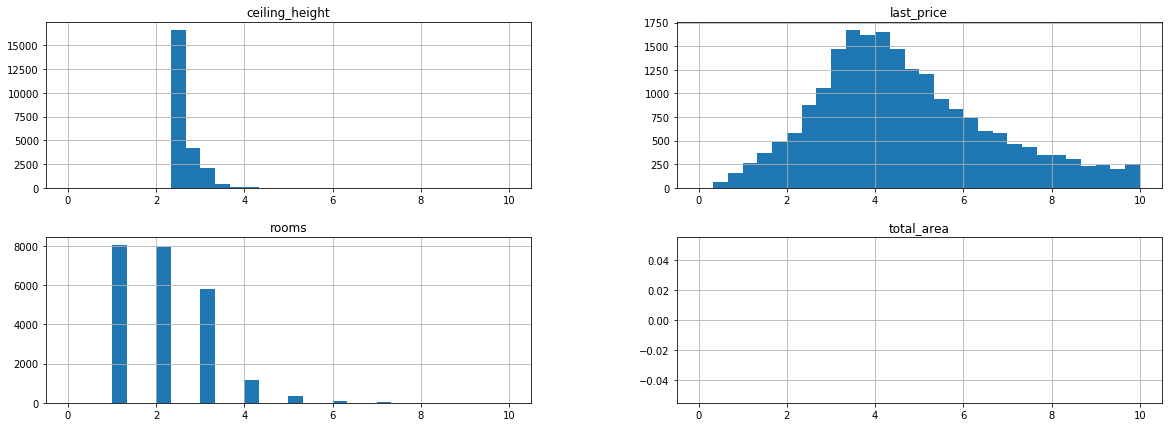

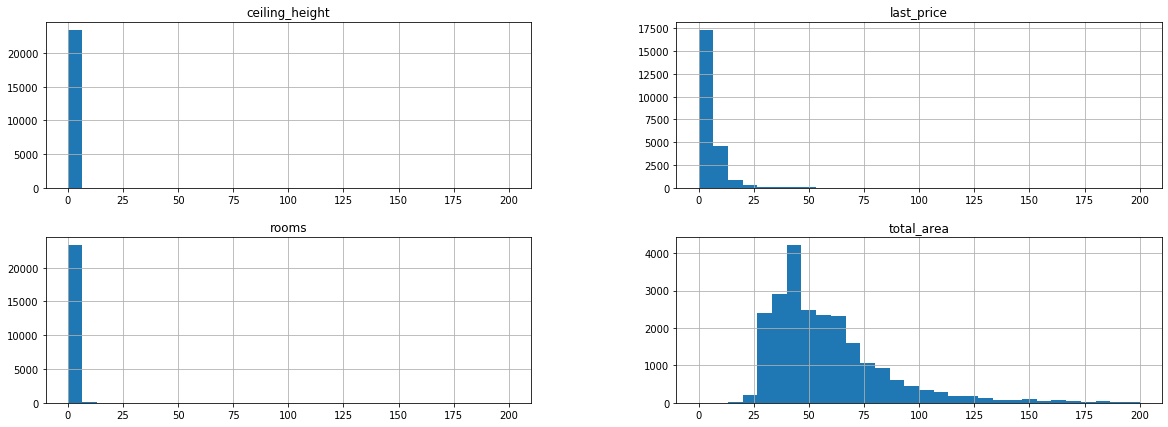

In [769]:
# Сохраним в переменной titles названия столбцов
titles = ['Высота потолков', 'Общая площадь', 'Количество комнат', 'Цена']
# Построим гистограммы, для наглядности в разных диапазонах
for name in range(1):
    df.hist(bins=30, figsize=[20,7], range=(0,10)),
    df.hist(bins=30, figsize=[20,7], range=(0,200))

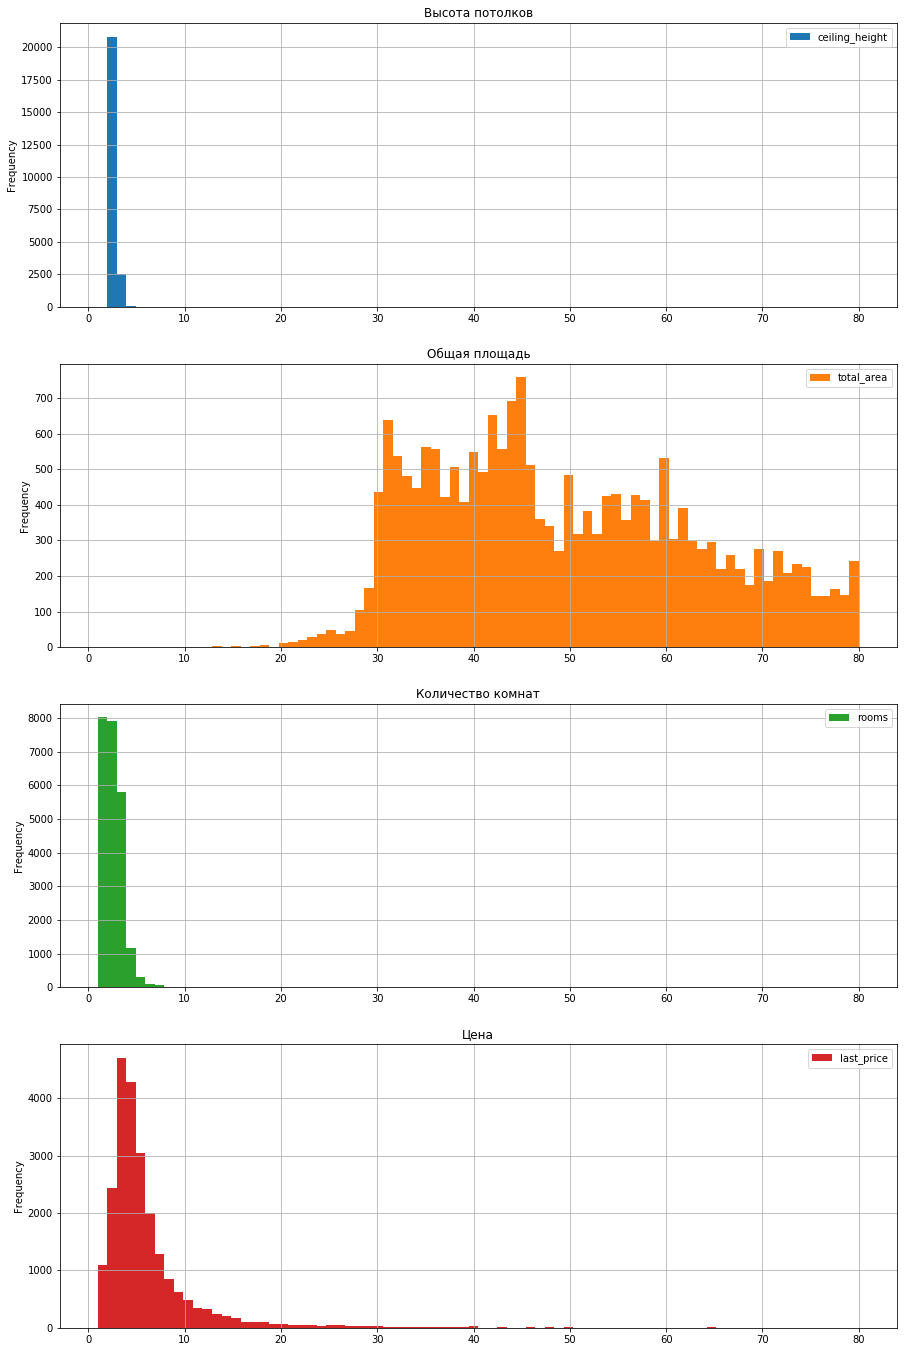

In [770]:
# Для сравнения построим и проанализируем гистограммы методом plot
titles = ['Высота потолков', 'Общая площадь', 'Количество комнат', 'Цена']
for name in range(1):   
    df.plot(kind='hist', subplots=True, bins=80, figsize=[15,24], sharex = False, 
    range=(1,80), grid=True, title=titles)

На основе построенных гистограмм можно сделать следующие выводы:
<br/>- Самые распространенные значения высоты потолков расположены в достаточно узком диапазоне от 2.5 до 2.8 метров, что соответветствует установленым в Российской Федерации нормативам. Выбивающиеся значения достаточно редки и могут быть в последствии отсечены, без угрозы потери значительной части данных. Незначительный но явный всплеск на 3м соответствует нормативу применявшемся при осуществлении "сталинской" застройки который составлял 3м, а так же ряд дореволюционных доходных домов так же обладает высотой потолков около 3м.
<br/>- Абсолютное большинство квартир обладают площадью от 30 до 80 кв.м, что коррелирует с данными Росстата, согласно которым средняя площадь квартир в Российской Федереации в 2019 году составляет 55кв.м. Пик графика приходится на величену в 46кв.м, что соответствует площади двухкомнатной "хрущевки", одного из наболее распростаненных типов жилой застройки советского периода. Квартиры площадью свыше 100м2 встречаются, но уже несравнимо реже.
<br/>- Наиболее распространенными являются 1 и 2 комнатные квартиры, примерно в равных долях. 3х комнатные квартиры встречаются уже на 30% реже. 4ех комнатные квартиры встречаются в 5 раз реже чем 3ех комнатные. Недвижимость с количеством комнат более 5 уже встречается крайне редко.
<br/>- Квартиры в самом массовом их сегменте продаются по цене от 2.5 до 5 млн рублей. Квартиры стоимостью от 5 до 8 млн рублей, так же достаточно сильно распространены на рынке. После 8 млн рублей происходит ощутимое снижение количества предложений. Дальнейший ценовой разброс предложений обладает широким диапазоном от 10млн до 763 млн рублей и статистически представляет собой редкие исключения, большую часть данной группы можно отнести к разряду сверх дорогой недвижимости и анализировать отдельно, так как ценообразование в данной категории может формироваться по иным правилам нежели в самом массовом сегменте.

#### Исследование количества времени для продажи квартиры

Решим поставленную задачу "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

In [771]:
# Для детального изучения применим метод describe к нашему датафрейму, отдельно конкретизируем процентную детализацию
percetnage =[.10, .85, .90, .95, .99]
data.describe(percentiles=percetnage)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,square_meter_price_mln,year_exposition,living_ratio_%,kitchen_ratio_%
count,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,...,8018.000000,17992.000000,8998.000000,23405.000000,21525.000000,21342.000000,23405.000000,23405.000000,23405.000000,23405.000000
mean,9.879812,6.554656,60.335142,2.087417,2.696308,10.632130,34.389959,5.871822,10.337236,0.587310,...,490.515465,0.768842,518.281507,9.879812,0.563679,0.187385,0.099764,2017.368554,55.653621,17.830250
std,5.681014,10.855984,35.508037,1.065997,0.215647,6.559363,22.268847,4.864826,6.073727,0.957944,...,342.886668,0.938010,277.857878,5.681014,0.104661,0.072977,0.050298,1.039776,10.125872,6.985631
min,0.000000,0.012190,12.000000,1.000000,2.200000,1.000000,2.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,13.000000,0.000000,0.021583,0.025381,0.000112,2014.000000,2.000000,2.000000
10%,2.000000,2.500000,33.000000,1.000000,2.500000,5.000000,16.000000,1.000000,6.000000,0.000000,...,158.000000,0.000000,145.000000,2.000000,0.426034,0.108929,0.055824,2016.000000,42.000000,10.000000
50%,9.000000,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,453.000000,1.000000,502.000000,9.000000,0.566667,0.172414,0.095349,2017.000000,56.000000,17.000000
85%,17.000000,8.823200,82.000000,3.000000,2.800000,18.000000,49.000000,10.000000,14.000000,2.000000,...,694.000000,2.000000,837.000000,17.000000,0.671777,0.263158,0.128571,2018.000000,66.000000,25.000000
90%,19.000000,10.990000,93.000000,3.000000,3.000000,22.000000,55.000000,13.000000,16.000000,2.000000,...,762.300000,2.000000,897.000000,19.000000,0.695652,0.281250,0.139706,2019.000000,68.000000,27.000000
95%,20.000000,15.340000,116.000000,4.000000,3.110000,25.000000,69.000000,16.000000,20.000000,2.000000,...,967.150000,3.000000,977.150000,20.000000,0.725490,0.313480,0.161538,2019.000000,72.000000,30.000000
99%,20.000000,35.951364,197.000000,5.000000,3.550000,26.000000,121.000000,23.000000,36.000000,5.000000,...,2102.000000,3.000000,1159.000000,20.000000,0.788705,0.422238,0.267621,2019.000000,78.000000,41.000000


In [772]:
# Применим метод describe к столбцу days_exposition
data['days_exposition'].describe()

count    23405.000000
mean         9.879812
std          5.681014
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: days_exposition, dtype: float64

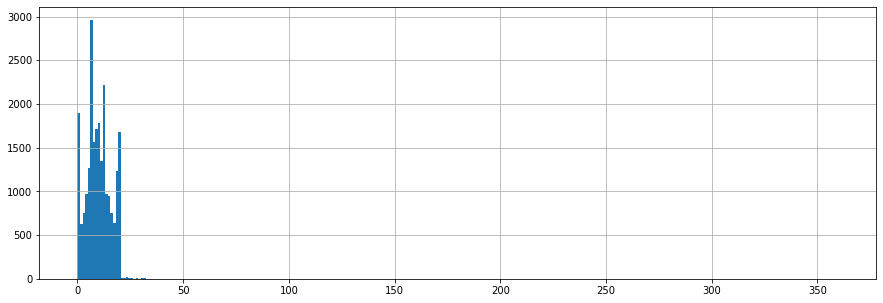

In [773]:
# Построим гистограмму продолжительности пребывания обявлений на сайте
data['days_exposition'].hist(bins=300, figsize=[15,5], range=(0,360))

In [774]:
# Подсчитаем среднюю продолжительность актуальности размещененного обявления
data['days_exposition'].mean()

9.879812005981627

In [775]:
# Подсчитаем медиану
data['days_exposition'].median()

9.0

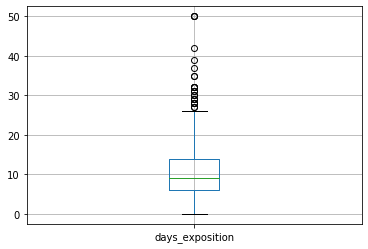

In [776]:
data.boxplot('days_exposition')

Общая тенденцения продолжительности размещения объявлений на дистанции в 1 год, является довольно ровной и обладет небольшой нисходящей направленностью. Подавляющая масса объявлений закрывается в первые полгода после размещения. Среднее значение составляет 168 дней, но оно зависимо от максимальных значений которые пристутствуют в данных, несущественная часть объявлений открыты по 3-4 года и оказывают влияние на среднюю продолжительность. Более показательным является значение медианы в 96 дней, именно этим значением были заменены пропуски в данном столбце, этим же объясняется всплеск на гистограмме в районе 96 дней. Всплески в районе 45 и 60 дней, менее ярковыражены и могут быть вызваны естественным стечением обстоятельств или существующей механникой окончания срока размещения платных объявлений.

#### Анализ редких и выбивающихся значений

"Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."

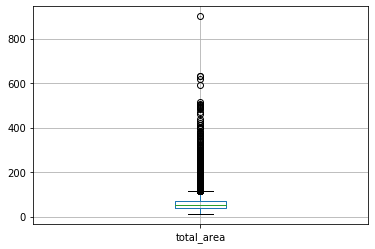

In [777]:
# В столбце с общей площадью квартир наблюдается значительное количество аномальных значений.
data.boxplot(column='total_area')

In [778]:
# Попробуем выделить аномальные значения площади недвижимости с помощью метода describe,
# дполнительно детализируем процентную разбивку
percetnage =[.10, .85, .90, .95, .99]
data['total_area'].describe(percentiles=percetnage)

count    23405.000000
mean        60.335142
std         35.508037
min         12.000000
10%         33.000000
50%         52.000000
85%         82.000000
90%         93.000000
95%        116.000000
99%        197.000000
max        900.000000
Name: total_area, dtype: float64

In [779]:
# Согласно имющихся данных лишь 1% от всех объявлений обладал площадью свыше 197м2, можно предположить что недвижимость с большой
# плоащдью обладает иными принципами ценообразования, соответственно дабы защитить результаты исследования от искажений выделим 
# все объявления с площадью свыше 197м2 в отдельную категорию
data_large_area = data.query('total_area > 197')

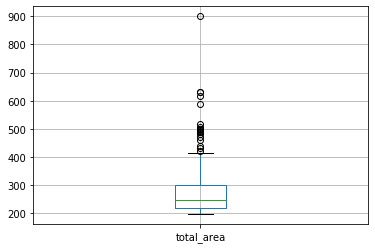

In [780]:
data_large_area.boxplot(column='total_area')

In [781]:
# Оставим в датафрейме объявления с площадью меньее 197 м2
data = data.query('total_area < 197')

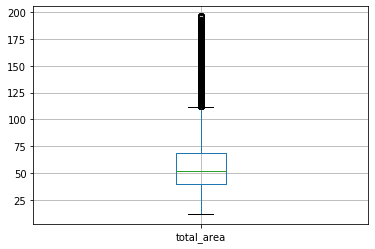

In [782]:
data.boxplot(column='total_area')

Основное количесвто объявлений выделенных в категорию больших и обладающих площадью свыше 197м2 сосредоточено в диапазоне  от 220 до 300 м2. Среди остальных объявлений, основная масса сосредоточена в диапазоне от 40 до 70м2. 

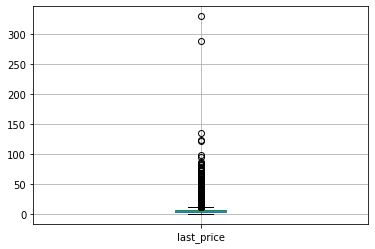

In [783]:
data.boxplot(column='last_price')

In [784]:
# Попробуем выделить аномальные значения цены квартир с помощью метода describe, дполнительно детализируем процентную разбивку
percetnage =[.10, .85, .90, .95, .99]
data['last_price'].describe(percentiles=percetnage)

count    23168.000000
mean         6.035645
std          6.194205
min          0.012190
10%          2.500000
50%          4.605003
85%          8.500000
90%         10.500000
95%         14.000000
99%         27.584724
max        330.000000
Name: last_price, dtype: float64

In [785]:
# На основании полученых данных видно что лишь 1% квартир обладает стоимостью свыше 27.5 млн рублей,
# выделим их в отдельную категорию
huge_price = data.query('last_price > 27.5')

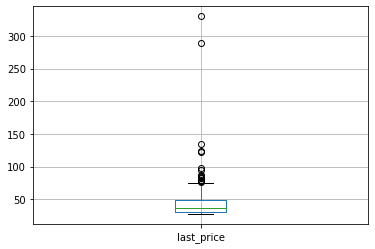

In [786]:
huge_price.boxplot(column='last_price')

In [787]:
# Оставим в датафрейме лишь квартиры стоимостью меньше 27.5 млн рублей
data = data.query('last_price < 27.5')

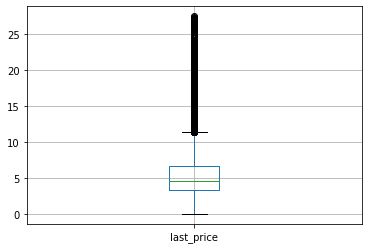

In [788]:
data.boxplot(column='last_price')

Среди квартир выделенных в категорию стоимостью свыше 27.5 млн рублей, основная масса предложений расположена в диапазоне от 30 до 50 млн рублей. Среди предложений стоимостью менее 27.5 млн рублей наибольшее распространение получила недвижимость в ценовой категории от 4 до 7 млн рублей.

In [789]:
# Выделим аномальные значения количества комнат с помощью метода describe, дполнительно детализируем процентную разбивку
percetnage =[.10, .85, .90, .95, .99]
data['rooms'].describe(percentiles=percetnage)

count    22933.00000
mean         2.03580
std          0.96849
min          1.00000
10%          1.00000
50%          2.00000
85%          3.00000
90%          3.00000
95%          4.00000
99%          5.00000
max         11.00000
Name: rooms, dtype: float64

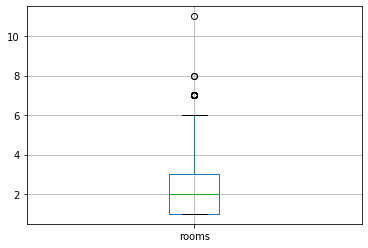

In [790]:
data.boxplot(column='rooms') # Благодаря исключеным ранее аномальным значениям, из столбца 'rooms' пропали 20и комнатные квартиры

Можно сделать вывод что лишь 1% от общего числа объявлений имеет количество комнат свыше 5, аномальные значания в виде недвижимости с количеством комнат больше 11и исчезли в результате отсечения аномальных значений в столбцах с общей площадью и ценой. Среди оставшихся предложений, наибольшее распространение получили объявления с числом комнат от 1-3, что соответсвтует выводам сформулированым ранее.

#### Исследование факторов, влияющих на стоимость квартиры

Найдем ответ на вопрос "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 

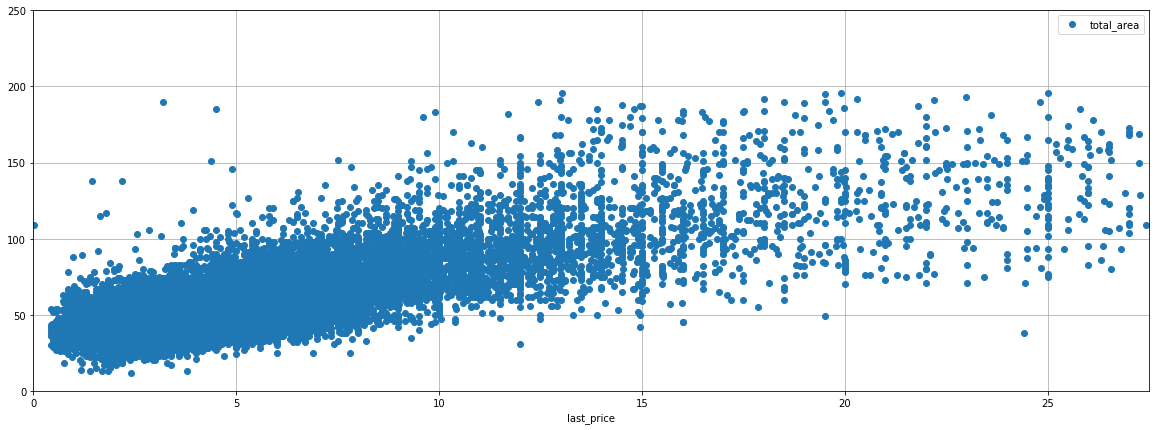

In [791]:
# Визуалируем зависимость цены недвижимости от общей площади
data.plot(x='last_price', y='total_area',
style='o', xlim=(0, 27.5), ylim=(0, 250), figsize=(20, 7), grid=True)

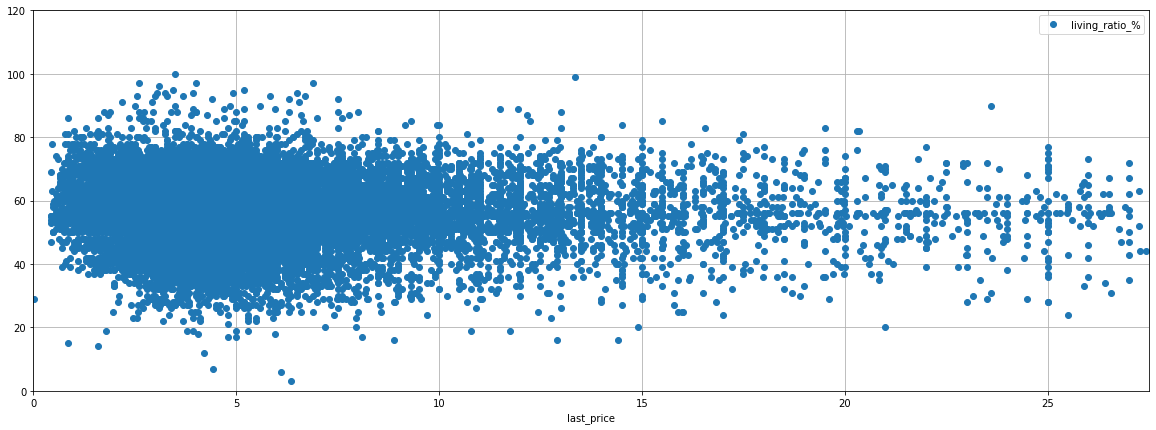

In [792]:
# Визуалируем зависимость цены недвижимости от жилой площади
data.plot(x='last_price', y='living_ratio_%',
style='o', xlim=(0, 27.5), ylim=(0, 120), figsize=(20, 7), grid=True)

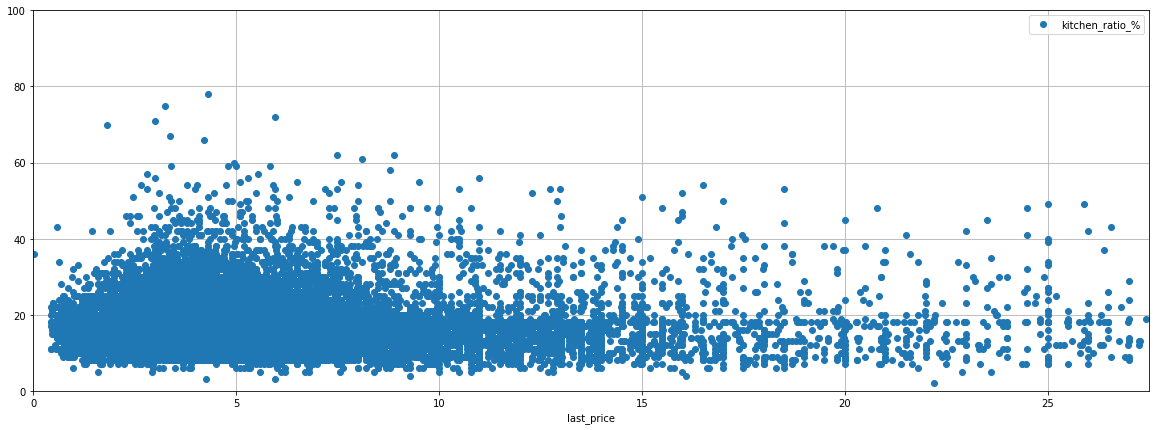

In [793]:
# Визуалируем зависимость цены недвижимости от площади кухонных помещений
data.plot(x='last_price', y='kitchen_ratio_%',
style='o', xlim=(0, 27.5), ylim=(0, 100), figsize=(20, 7), grid=True)

In [794]:
# На основе сформированых графиков можно сделать вывод о том что, присутствует прямая зависимость цены недвижимости от ее площади 
# зависимость же стоиомсти недвижимости от площади жилых и кухонных помещений намного менее очевидна

In [795]:
# Сформируем сводную таблицу отражающую зависимость между стоимостью недвижимости и числом комнат
data.pivot_table(index='rooms',values='last_price',aggfunc='mean')

,last_price
rooms,
1,3.804936
2,5.446542
3,7.291587
4,9.911708
5,12.309263
6,13.994505
7,17.138235
8,19.145000
11,17.500000


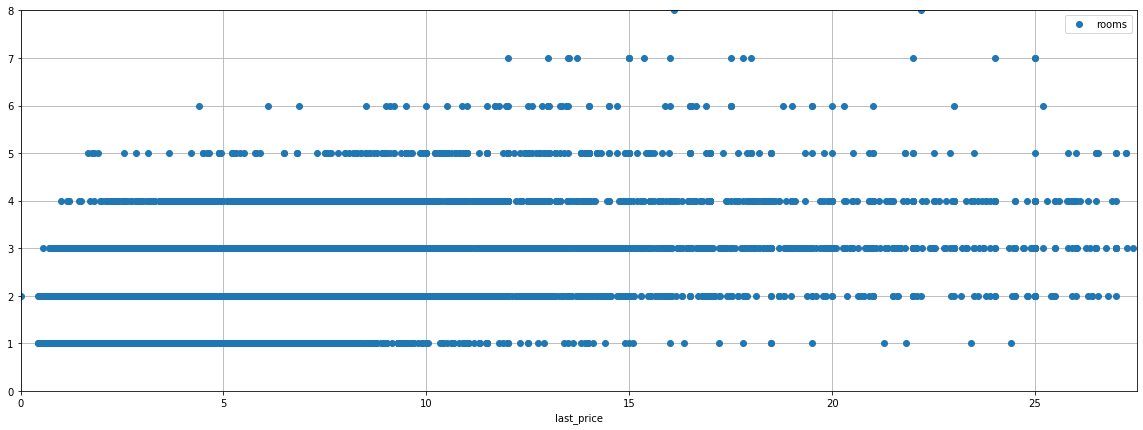

In [796]:
# Сводная таблица дает достаточно наглядное понимание того какое влияние количество комнат оказывает на стоимость недвижимости
# Можно выделить даже шаг удорожания квартир который составляет около 1.5 млн рублей за каждую комнату, завимисоть прослеживается
# вплодь до 4х комнатных квартир 
data.plot(x='last_price', y='rooms',
style='o', xlim=(0, 27.5), ylim=(0, 8), figsize=(20, 7), grid=True)

In [797]:
# Сформируем сводную таблицу отражающую зависимость цены недвижимости от этажа ее расположения.
data.pivot_table(index='floor_type',values='last_price',aggfunc='mean')

,last_price
floor_type,
Другой,5.881377
Первый,4.505539
Последний,5.377143


In [798]:
# На основании сводной таблицы можно сделать вывод о том что, недвижимость расположеная на первом этаже существенно дешевле, 
# недвижимости расположено на иных этажах

In [799]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

In [800]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')

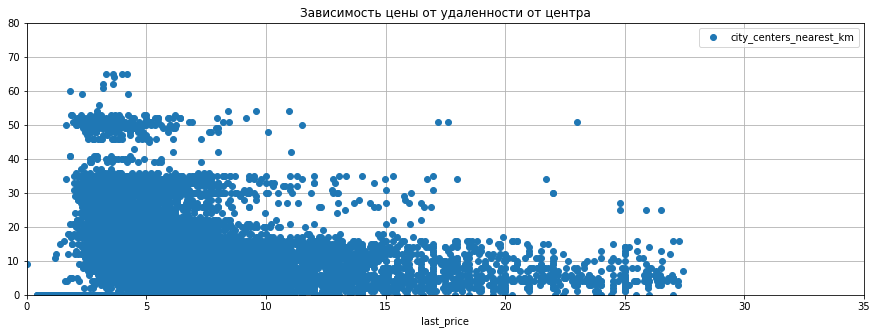

In [801]:
# Визуализируем на графике зависимость между ценой недвижимости и ее удалением от центра
data.plot(x='last_price', y='city_centers_nearest_km', title='Зависимость цены от удаленности от центра',
style='o', xlim=(0, 35), ylim=(0, 80), figsize=(15, 5), grid=True)

In [802]:
# На данном графике прослеживается существенное снижение стоимости квартир на отдолении от центра в более чем 8 километров 
# из чего можно сделать можно сделать вывод о том что эффект "центра"  существенно влияющий на стоимость недвижимости, 
# начинает серьезно ослабевать при уделании от центра более чем на 8 километров.

In [803]:
# Для опреденлия зависимости стоимости недвижимости от дня недели размещения объявления построим сводную таблицу
data.pivot_table(index='day_name_exposition',values='last_price',aggfunc='mean')

,last_price
day_name_exposition,
Friday,5.580186
Monday,5.668213
Saturday,5.393982
Sunday,5.469581
Thursday,5.756855
Tuesday,5.678822
Wednesday,5.689753


In [804]:
# Для опреденлия зависимости стоимости недвижимости от месяца размещения объявления построим сводную таблицу
data.pivot_table(index='month_name_exposition',values='last_price',aggfunc='mean')

,last_price
month_name_exposition,
April,5.704180
August,5.606914
December,5.672265
February,5.639209
January,5.667477
July,5.659322
June,5.380823
March,5.606764
May,5.588177


In [805]:
# Для опреденлия зависимости стоимости недвижимости от года размещения объявления построим сводную таблицу
data.pivot_table(index='year_exposition',values='last_price',aggfunc='mean')

,last_price
year_exposition,
2014,9.206851
2015,6.459472
2016,5.572861
2017,5.558469
2018,5.469817
2019,5.938095


In [806]:
# Зависимость цены недвижимости от дня недели размещения объявления, не прослеживается, разброс значений крайне незначителен 
# и не превышает среднестатистической погрешности.
# Зависимость цены недвижимости от того в каком месяце размещено объявление, присутствует, но явный эффект можно выделить в 
# июне, здесь обнаружено снижение средней стоимости размещенных объявлений до 5.3 млн рублей, а так же можно выделить повышение  
# средней стоимости размещенных объявлений до 5.79 млн рублей в сентябре.
# Удалось проследить существенную зависимость цены размещенной недвижимости от года размещения объявления, так в 2014 году средняя 
# стоимость размещенной недвижимости составляла 9.2 млн рублей, в последующие годы это значание существенно снизилось. Данный факт 
# можно объяснить повышением распространенности сервиса среди наиболее массовой категории пользоватлей после 2014 года и как соедствие 
# снижения средней стоимости размещаемой недвжимости, а так же можно связать с кризисными являениями 2014 года.

#### Анализ десяти населённых пунктов с наибольшим числом объявлений

Решим поставленную задачу "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "

In [807]:
# Сохраним в переменную names и выведем названия 10 населенных пунктов с наибольшим числом объявлений
names = data['locality_name'].value_counts().head(10)

In [808]:
print(names)

Санкт-Петербург      15129
поселок Мурино         528
поселок Шушары         436
Всеволожск             391
Пушкин                 363
Колпино                337
поселок Парголово      322
Гатчина                306
деревня Кудрово        283
Выборг                 235
Name: locality_name, dtype: int64


In [809]:
# Сохраним в переменной names_big названия 10 населнных пунктов с самым большим числом объявлений
names_big = (['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин',
              'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'])

In [810]:
print(names_big)

['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


In [811]:
# Сохраним в переменной top10_data данные всех объявлений размещенных в топ 10 населнных пунктов с самым большим числом объявлений
top10_data = data.query('locality_name in @names_big')

In [812]:
# Применим метод describe к переменной top10_data
top10_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,square_meter_price_mln,year_exposition,living_ratio_%,kitchen_ratio_%,city_centers_nearest_km
count,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.00000,...,16535.000000,8137.000000,18330.000000,16975.000000,16783.000000,18330.000000,18330.000000,18330.000000,18330.000000,18330.000000
mean,9.946372,6.287890,58.892580,2.060993,2.702962,11.615712,33.425041,6.353628,10.345336,0.59509,...,0.734805,526.702470,9.946372,0.560339,0.190528,0.105469,2017.350191,55.342717,18.125586,11.318385
std,5.677073,3.806161,25.951868,0.991970,0.213821,6.658834,17.265706,5.102527,5.216812,0.96693,...,0.908414,278.177368,5.677073,0.104833,0.073661,0.030951,1.038963,10.174218,7.069188,7.086405
min,0.000000,0.012190,12.000000,1.000000,2.300000,1.000000,2.000000,1.000000,1.000000,0.00000,...,0.000000,13.000000,0.000000,0.038462,0.026151,0.000112,2014.000000,3.000000,2.000000,0.000000
25%,6.000000,3.900000,40.000000,1.000000,2.600000,5.000000,19.000000,3.000000,7.000000,0.00000,...,0.000000,303.000000,6.000000,0.490128,0.135407,0.086154,2017.000000,50.000000,13.000000,6.000000
50%,10.000000,5.100000,53.000000,2.000000,2.650000,9.000000,30.000000,5.000000,9.000000,0.00000,...,0.000000,515.000000,10.000000,0.563452,0.175439,0.100000,2017.000000,56.000000,17.000000,12.000000
75%,14.000000,7.250000,70.000000,3.000000,2.700000,16.000000,42.000000,9.000000,12.000000,1.00000,...,1.000000,741.000000,14.000000,0.634048,0.236842,0.118750,2018.000000,62.000000,22.000000,15.000000
max,50.000000,27.420000,196.000000,11.000000,4.800000,52.000000,164.000000,33.000000,65.000000,5.00000,...,3.000000,1337.000000,50.000000,0.983447,0.787879,0.642445,2019.000000,100.000000,78.000000,37.000000


In [813]:
# Сформируем сводную таблицу отражающую зависимость от города в котором размещен объект недвижимости и его ценой для
# 10 населнных пунктов с самым большим числом объявлений
top10_price = top10_data.pivot_table(index='locality_name', values='square_meter_price_mln', aggfunc='mean')

In [814]:
# Отсортируем полученные значения по убванию
top10_price.sort_values(by = 'square_meter_price_mln', ascending = False)

,square_meter_price_mln
locality_name,
Санкт-Петербург,0.110603
Пушкин,0.103193
деревня Кудрово,0.092836
поселок Парголово,0.090952
поселок Мурино,0.085651
поселок Шушары,0.078801
Колпино,0.075645
Гатчина,0.069057
Всеволожск,0.069006


На основании полученных данных можно сделать вывод о том что цена объекта недвижимости напрямую зависит от того в каком населенном пункте расположен объект недвижимости. В нашем случае максимальная стоимость квадртаного метра присуща недвижимости расположенной в городе Санкт-Петербурге, а именно средняя стоимость квадратного метра составила 110 тысч рублей. В остальных населенных пунктах наблюдается корреляция между стоимостью квадратного метра жилья и удаленностью от города Санкт-Петербурга. Например в городе Пушкин расположенном на расстоянии 25км от Санкт-Петербурга средняя стоимость  квадтраного метра составила 103 тысячи рублей, а в городе Гатчина расположеном в 46км от Санкт-Петербурга средняя стоимость квадтраного метра составиляет уже 69 тысяч рублей и для города Выборг находящегося от Санкт-Петербурга 
на удалении в 139км средняя стоимость квадтраного метра падает до 58 тысяч рублей.

#### Анализ изменения цены по степени удалённости от центра

Решим поставленную задачу "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

In [815]:
# Выделим объявления о продаже недвижимости расположеной городе Санкт-Петербурге и сохраним их в переменной data_spb
data_spb = data.query('locality_name == "Санкт-Петербург"')

In [816]:
# Подсчитаем количество таких объявлений
print(data_spb['locality_name'].value_counts())

Санкт-Петербург    15129
Name: locality_name, dtype: int64


In [817]:
# Проанализурем разброс удаления от цетра таких объектов недвижимости с помощью метода describe
data_spb['city_centers_nearest_km'].describe()

count    15129.000000
mean        11.238681
std          4.799105
min          0.000000
25%          8.000000
50%         12.000000
75%         14.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

In [818]:
def center_range(row): # Напишем функцию для категоризации объектов недвижмости в зависимости от их удаления от центра города
     if 1 <= row <= 5:  
       return 'very_low_range' # Расстояние до центра от 1 до 5 км very_low_range
     elif 5 <  row <= 10:
       return 'low_range' # Расстояние до центра от 5 до 10 км low_range
     elif 10 < row <= 20:
       return 'medium_range' # Расстояние до центра от 10 до 20 км medium_range
     elif 20 < row <= 40:
       return 'large_range' # Расстояние до центра от 20 до 40 км large_range
     elif 40 < row <= 65:
       return 'very_large_range' # Расстояние до центра от 40 до 65  very_large_range


In [819]:
# Прмиеним полученную функцию к датафрейму и сохраним результат в столбце range_categories
data['range_categories'] = data_spb['city_centers_nearest_km'].apply(center_range)

In [820]:
# Выведем и подсчитаем полученные значения
data['range_categories'].value_counts()

medium_range      9077
low_range         3014
very_low_range    2451
large_range        473
Name: range_categories, dtype: int64

In [821]:
data_good_range = data.query('city_centers_nearest_km > 0')

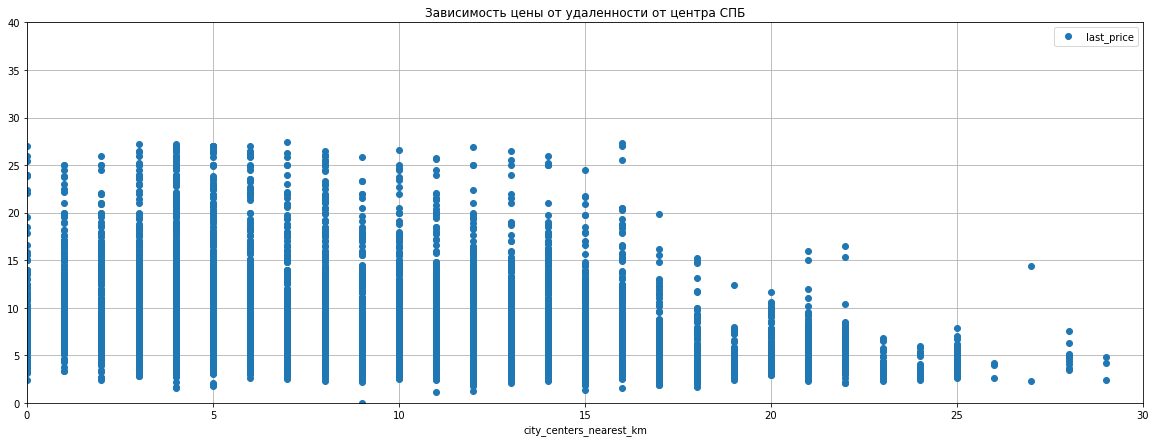

In [822]:
# Построим график Зависимость цены от удаленности от центра СПБ и разместим на нем все объявления
data_spb.plot(x='city_centers_nearest_km', y='last_price', style='o',
              title='Зависимость цены от удаленности от центра СПБ',
              xlim=(0, 30), ylim=(0, 40), figsize=(20, 7), grid=True)

In [823]:
# Попробуем сделать график более информативным, сформируем сводную таблицу отражающую зависимсть средней цены недвижимости
# от расстояния до центра Санкт-Петербурга
data_price_by_range = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')

In [824]:
# Рассмотрим полученую таблицу
print(data_price_by_range.head(12))

                         last_price
city_centers_nearest_km            
0                         10.020092
1                         10.878377
2                         10.221990
3                          9.663044
4                         10.555292
5                          9.643911
6                          9.125529
7                          8.656456
8                          8.036717
9                          6.225631
10                         6.193867
11                         5.868939


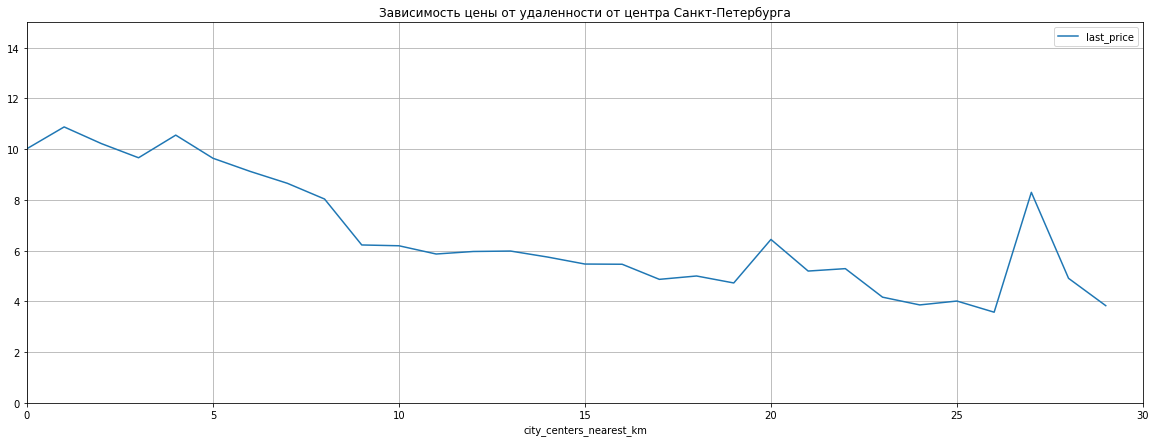

In [825]:
# На основании полученной таблицы построим график Зависимость цены от удаленности от центра Санкт-Петербурга
(data_spb
     .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
     .plot(grid=True, xlim=(0, 30), ylim=(0, 15), figsize=(20, 7), title='Зависимость цены от удаленности от центра Санкт-Петербурга')
)

In [826]:
# На получившемся графике прослеживается всплеск выбивающийся их общей картины на расстоянии 27 от центра, изучим чем он вызван
data_spb.query('city_centers_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_part,kitchen_part,square_meter_price_mln,day_name_exposition,month_name_exposition,year_exposition,floor_type,living_ratio_%,kitchen_ratio_%,city_centers_nearest_km
748,13,14.35,74,2017-11-28,2,3.13,5,30,3,False,...,0.405405,0.337838,0.193919,Tuesday,November,2017,Другой,40,33,27
5961,6,2.25,32,2018-02-27,1,2.65,2,16,2,False,...,0.515625,0.218750,0.070312,Tuesday,February,2018,Последний,50,21,27


In [827]:
# Всплеск на расстоянии 27 от центра вызван присутствием аномально дорого объекта недвижимости стоимостью 14 млн рублей и 
# усугублен крайне узкой статистической выборкой, в данной категории всего 2 объявления

In [828]:
data_spb['last_price'].describe()

count    15129.000000
mean         6.740623
std          3.946121
min          0.012190
25%          4.200000
50%          5.480000
75%          7.800000
max         27.420000
Name: last_price, dtype: float64

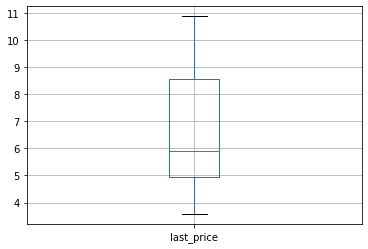

In [829]:
# Изучим расределение значений
data_price_by_range.boxplot(column='last_price')

На основнии полученных данных видно что график зависимости цены недвижимости от удаленности от центра Санкт-Петербурга сильно в значительной степени меняется на расстоянии 8 километров от центра, соответственно центром города, оказывающим сщуественный эффект на цену недвижимости, можем считать все что расположено внутри радиуса 8 км от географического центра города Санкт-Петербурга.
Среднняя цена недвижимости в Санкт-Петербурге существенно выше чем в остальных населенных пунктах, присутствующих в наших данных, основная масса недвижимости обладет стоимостью в диапазоне от 5 млн до 8,5 млн рублей. Среднняя цена объекта недвижимости в Санкт-Петербурга составила 6.7 млн рублей.

#### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выполним поставленную задачу "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [830]:
# Сделаем выборку данных, оставим только объявления расположенные не дальше чем 8км от центра Санкт-Петербурга
# Результат сохраним в переменную data_center_flats
data_center_flats = data_spb.query('city_centers_nearest_km <= 8')

In [831]:
# Изучим данные полученные в data_center_flats методом describe
data_center_flats.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,living_part,kitchen_part,square_meter_price_mln,year_exposition,living_ratio_%,kitchen_ratio_%,city_centers_nearest_km
count,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,...,3947.000000,2737.000000,3997.000000,3681.000000,3646.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000
mean,9.872154,9.541083,76.410808,2.544408,2.883610,7.788091,44.715036,4.443833,12.593945,0.340005,...,1.215860,477.487030,9.872154,0.578557,0.177927,0.126563,2017.234176,57.061046,17.048536,4.773830
std,5.839308,4.978427,32.976056,1.154415,0.323246,4.595704,22.820756,3.296745,6.753340,0.780604,...,1.070274,266.677496,5.839308,0.112834,0.081325,0.039956,1.113752,10.918837,7.781690,2.176263
min,0.000000,1.600000,12.000000,1.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,0.000000,0.038462,0.026151,0.015385,2014.000000,3.000000,2.000000,0.000000
25%,6.000000,6.000000,51.000000,2.000000,2.650000,5.000000,28.000000,2.000000,8.000000,0.000000,...,0.000000,252.000000,6.000000,0.512821,0.121622,0.098551,2017.000000,51.000000,12.000000,3.000000
50%,9.000000,8.260000,70.000000,2.000000,2.750000,6.000000,41.000000,4.000000,11.000000,0.000000,...,1.000000,454.000000,9.000000,0.593220,0.155556,0.119412,2017.000000,57.000000,16.000000,5.000000
75%,14.000000,11.800000,95.000000,3.000000,3.050000,10.000000,56.000000,5.000000,15.000000,0.000000,...,2.000000,675.000000,14.000000,0.658740,0.212134,0.144792,2018.000000,65.000000,20.000000,7.000000
max,50.000000,27.420000,196.000000,11.000000,4.800000,28.000000,164.000000,24.000000,56.000000,5.000000,...,3.000000,1293.000000,50.000000,0.983447,0.625000,0.397959,2019.000000,99.000000,62.000000,8.000000


In [832]:
# Сформируем сводную таблицу с необходимыми параметрами
data_center_flats_multi = data_center_flats.pivot_table(index='city_centers_nearest_km', 
                        values = ['last_price', 'rooms','ceiling_height', 'total_area'], aggfunc='mean')

In [833]:
# Попробуем выявить корреляцию данных в сформированном датафрейме
print(data_center_flats_multi.corr())

                ceiling_height  last_price     rooms  total_area
ceiling_height        1.000000    0.860059  0.942963    0.971489
last_price            0.860059    1.000000  0.852628    0.910517
rooms                 0.942963    0.852628  1.000000    0.980583
total_area            0.971489    0.910517  0.980583    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ee89f53d0>,
      dtype=object)

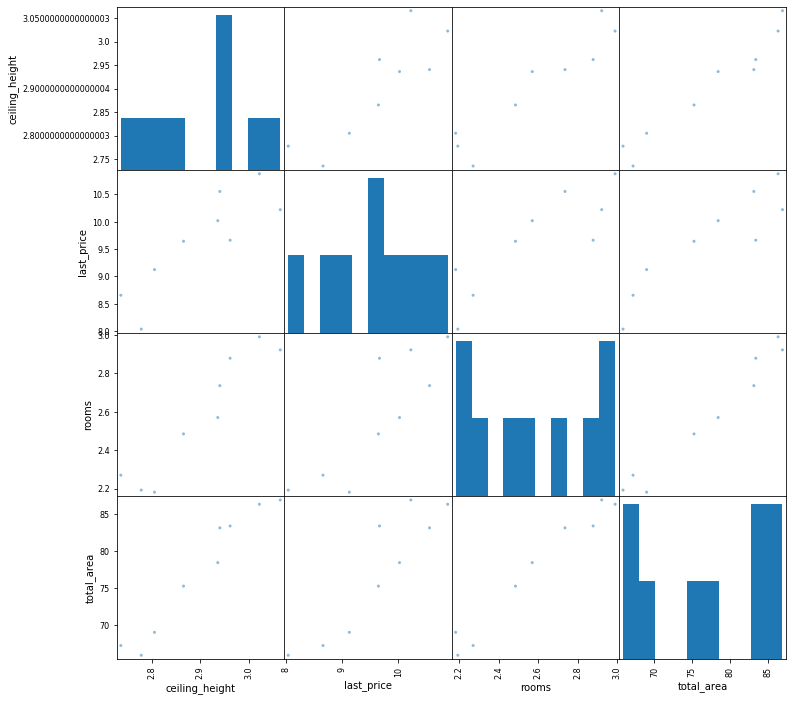

In [834]:
# Построим попарные точечные диаграммы для столбцов сформированного датафрейма
pd.plotting.scatter_matrix(data_center_flats_multi, figsize=(12, 12))

In [835]:
# Сформируем сводную таблицу  с необходимыми параметрами
data_center_flats_multi_2 = data_center_flats.pivot_table(index='total_area', 
                        values = ['floor', 'rooms','city_centers_nearest_km', 'last_price'], aggfunc='mean')

In [836]:
print(data_center_flats_multi_2.corr())

                         city_centers_nearest_km     floor  last_price  \
city_centers_nearest_km                 1.000000  0.282621   -0.340631   
floor                                   0.282621  1.000000    0.277551   
last_price                             -0.340631  0.277551    1.000000   
rooms                                  -0.439582  0.105883    0.875173   

                            rooms  
city_centers_nearest_km -0.439582  
floor                    0.105883  
last_price               0.875173  
rooms                    1.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ee51fe950>,
      dtype=object)

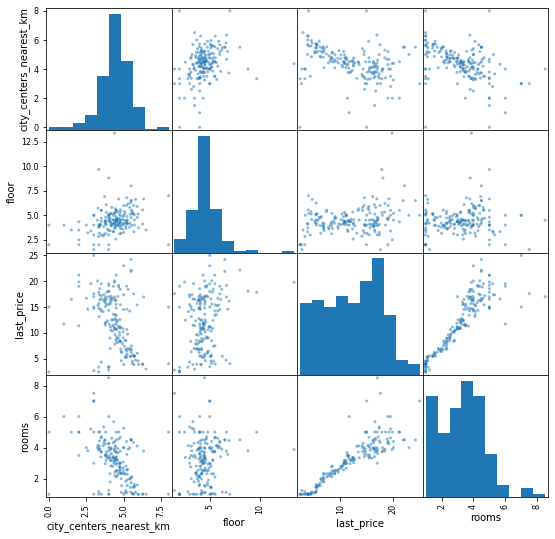

In [837]:
pd.plotting.scatter_matrix(data_center_flats_multi_2, figsize=(9, 9))

In [838]:
# Для опреденлия зависимости стоимости недвижимости от года размещения объявления построим сводную таблицу
data_center_flats.pivot_table(index='year_exposition',values='last_price',aggfunc='mean')

,last_price
year_exposition,
2014,13.100915
2015,10.029122
2016,9.648776
2017,9.477264
2018,9.296179
2019,9.722997


На оснвании полученных данных можно сделать следующие воводы:
- Средняя стоимость недвижимости в центре Санк-Петербурга составила составила 9.5 рублей,что значительно выше чем во всех остальных локациях среди представленных данных.
- Средняя стоимость квадратного метра в центре Санк-Петербурга составила 126 тысяч рублей за квадратные метр, что так же существенно выше всех остальных представленнных данных
- Все корреляции и зависимости между ценой и остальными параметрами недвижимости сохраняют свою актуальность для центра Санкт-Петербурга
- От остального города отличается лишь зависимость цены недвижмости от ее удаленности от центра, внутри обозначенных центральных 8 километрах от центра Санкт-Петербурга, цена изменяется неравномерно и недвижимость расположенная в трех киломтерах от центра может быть дешевле недвижмости расположенной в четырех километрах от центра.
- Зависимость цены недвижимости от даты размещения объявления, для центра Санкт-Петербурга сохраняется та же, что и для всего остального датафрейма.

### Шаг 5. Общий вывод

Резюмируя проделаную работу еще раз обозначим основные выводы:
- На цену недвижимости оказывают сущесвтенное вляиение такие факторы как: количество комнат, общая площадь объекта недвижимости, а так же то на каком этаже расположен продаваемый объект.
- На цену недвижимости вляют общие рыночные тенденции, средняя цена различается в зависимости от года размещения объявления.
- Цена квадратного метра недвижимости в Санкт-Петербурге существенно выше чем в Санкт-Петербургской области, и чем дальше от Санкт-Петербурга, тем ниже цена квадратного метра недвижимости.
- Недвижимость расположенная ближе 8км от географического центра Санкт-Петербурга существенно дороже всей остальной недвижимости. 
- Расположение недвижимости в центре Санкт-Петербурга не отменяет влияния на цену факторов актуальных для остальной части города, кроме самой близости к центру города.